In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots
import sklearn
from sklearn.mixture import GaussianMixture

Shape: (2950, 1)


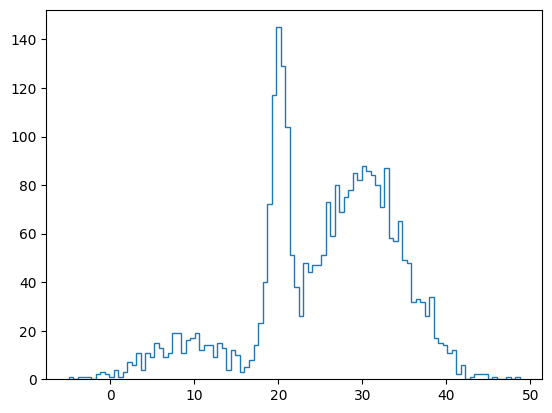

In [2]:
data = np.load('formationchannels.npy')
print('Shape:', (data).shape)
plt.hist(data,bins=100,histtype='step')
plt.show()

[20945.97260859 20754.15875188 20083.17588427 20101.61284915
 20112.22713799 20122.06666322 20127.79027454 20132.06943989
 20140.35803163 20141.08951351]


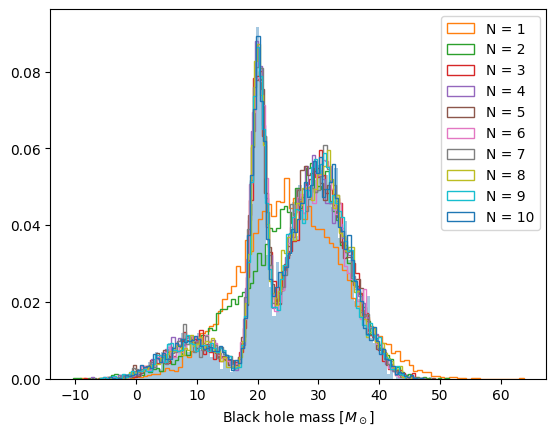

In [3]:
ncomp_arr = np.linspace(1,10,10).astype(int)
AIC = np.zeros(10)

x0 = np.linspace(0,50,1000)
x = x0[:,np.newaxis]
n_sample = 10000

plt.hist(data, bins=100, density=True, alpha=0.4)

for ncomponents in ncomp_arr[:10]:
    model = GaussianMixture(n_components=ncomponents)
    gm = model.fit(data)
    samples = gm.sample(n_sample)
    plt.hist(samples[0], bins=100, density=True, histtype='step', label="N = "+str(ncomponents))
    AIC[ncomponents-1] = gm.aic(data)
    
print(AIC)

plt.xlabel("Black hole mass $[M_\odot]$")
plt.legend()
plt.show()

#### Better
#fit models with 1-10 components

N = np.arange(1, 10)

models = [None for i in range(len(N))]

for i in range(len(N)):

    models[i] = GaussianMixture(N[i]).fit(X)


AIC = [m.aic(X) for m in models]

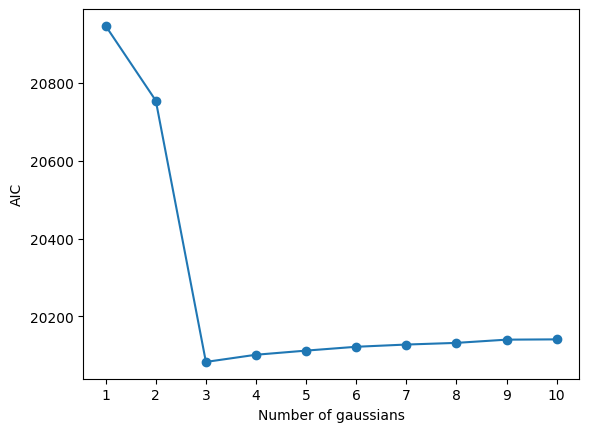

In [4]:
plt.plot(ncomp_arr, AIC)
plt.scatter(ncomp_arr, AIC)

plt.xlabel('Number of gaussians')
plt.ylabel('AIC')
plt.xticks(range(min(ncomp_arr), max(ncomp_arr) + 1))

plt.show()

In [5]:
print('The AIC is minimized for N =', ncomp_arr[np.argmin(AIC)])

The AIC is minimized for N = 3


### 3 gaussian model

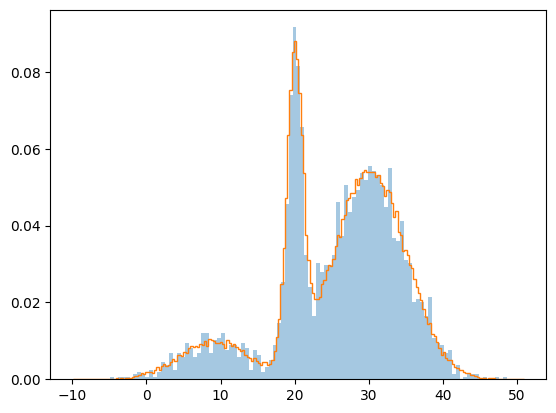

In [6]:
ncomponents = 3

model = GaussianMixture(n_components=ncomponents)
gm = model.fit(data)

n_sample = 100000
samples = gm.sample(n_sample)
#print(samples)

plt.hist(data, bins=100, density=True, alpha=0.4)
plt.hist(samples[0], bins=200, density=True, histtype='step')

plt.show()

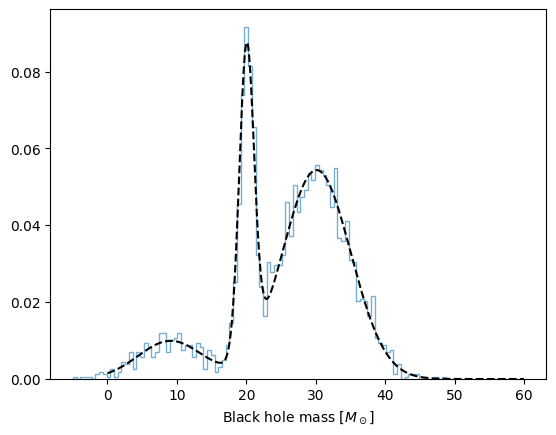

In [7]:
x = np.linspace(0, 60, 1000)

logprob = model.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

plt.hist(data, bins=100, density=True, histtype='step', alpha=0.6)

plt.plot(x, pdf, "--k")

plt.xlabel("Black hole mass $[M_\odot]$")
plt.show()

#### Single modes

Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

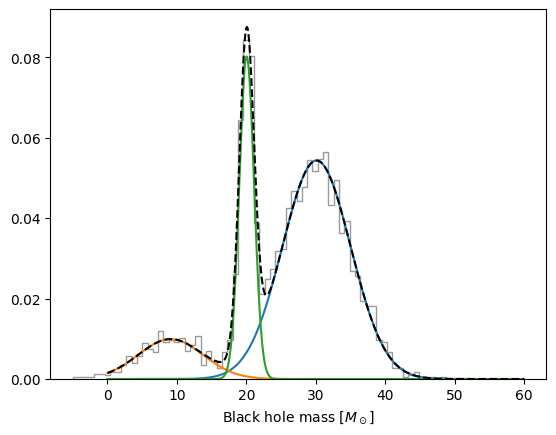

In [8]:
responsibilities = model.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(data, 70, density=True, histtype='step', alpha=0.4,color='black')
plt.plot(x, pdf_individual[:,0], c='C0')
plt.plot(x, pdf_individual[:,1], c='C1')
plt.plot(x, pdf_individual[:,2], c='C2')
plt.plot(x, pdf, '--k')

plt.xlabel("Black hole mass $[M_\odot]$")

Another way of representing the responsibilities

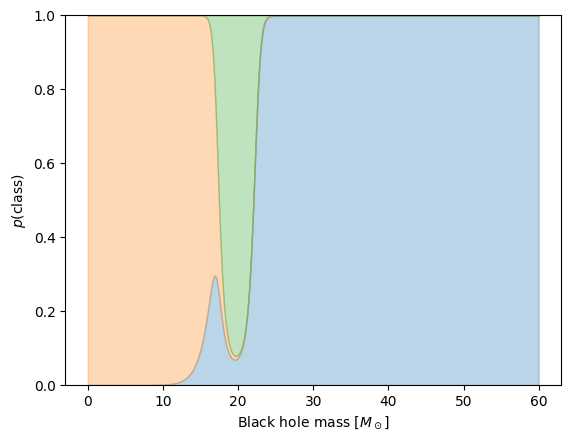

In [9]:
p = responsibilities
#p = p[:, (0, 1, 2)]  # rearrange order so the plot looks better
p = p.cumsum(axis=1).T

plt.fill_between(x, 0, p[0], color='C0', alpha=0.3)
plt.fill_between(x, p[0], p[1], color='C1', alpha=0.3)
plt.fill_between(x, p[1], 1, color='C2', alpha=0.3)
#plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.xlabel("Black hole mass $[M_\odot]$")

plt.ylabel(r'$p({\rm class})$');

#plt.text(-5, 0.3, 'class 1', rotation='vertical')
#plt.text(0, 0.5, 'class 2', rotation='vertical')
#plt.text(3, 0.3, 'class 3', rotation='vertical')


Log-Likelihoods:
[-5.16249833 -4.83997311 -4.78355524 -5.29521741 -4.99924488]


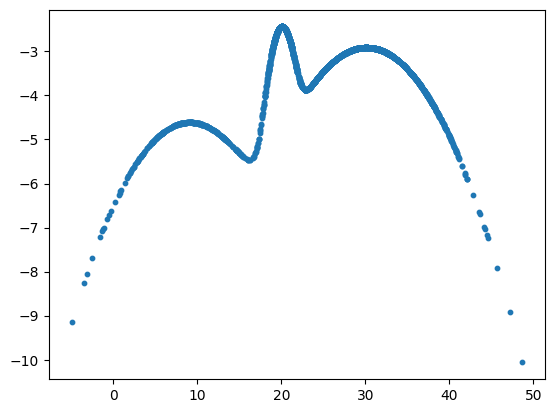

In [10]:
# Calcoliamo i log-likelihood di ciascun campione rispetto al modello
log_likelihoods = gm.score_samples(data)

# Stampiamo i primi 5 log-likelihoods e le prime 5 probabilità
print("Log-Likelihoods:")
print(log_likelihoods[:5])

plt.scatter(data,log_likelihoods, s=10)
plt.show()



Probabilità di appartenenza:
[[2.86635399e-01 3.95758077e-01 3.17606524e-01]
 [3.78384522e-05 9.99962162e-01 7.09584530e-38]
 [5.41586893e-05 9.99945841e-01 1.13054362e-35]
 [5.30403099e-06 9.99994696e-01 3.61118455e-51]
 [2.34108146e-02 9.76589160e-01 2.57313737e-08]]


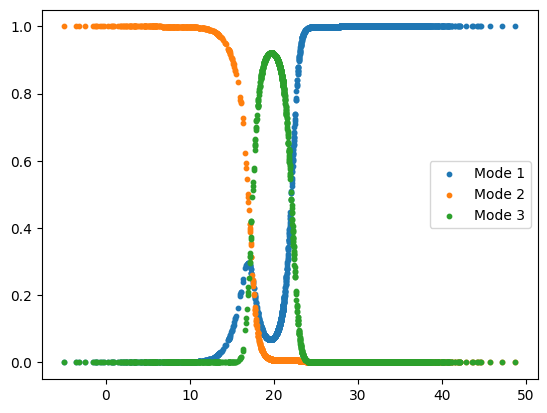

In [11]:
# Otteniamo le probabilità di appartenenza di ciascun campione a ciascun componente
probs = gm.predict_proba(data)

print("\nProbabilità di appartenenza:")
print(probs[:5])

plt.scatter(data,probs[:,0], s=10, label="Mode 1")
plt.scatter(data,probs[:,1], s=10, label="Mode 2")
plt.scatter(data,probs[:,2], s=10, label="Mode 3")

plt.legend()
plt.show()
